<a href="https://colab.research.google.com/github/hhhgraceyt/cusp_capstone/blob/master/In_flow_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Are there variations in preferred night-time transportation mode in different boroughs of the city? Can we explain why that might be? (Responsible: Grace || Several regression models predicting. Dependent var: night-time inflow by each transit mode), w/ (independent vars: borough dummy variable, station count [w/ others too])

In [ ]:
df19 = pd.read_csv('/content/drive/My Drive/Capstone_Regression/Final/merged19_csv_finalv3.csv')
df20 = pd.read_csv('/content/drive/My Drive/Capstone_Regression/Final/merged20_csv_finalv2.csv')

In [ ]:
#remove confusing marks in clumn names
df19.rename(columns = {'night?':'night','covid-19?':'covid19'}, inplace = True)
df20.rename(columns = {'night?':'night','covid-19?':'covid19'}, inplace = True)

**Data Processing**

In [ ]:
#filter out the night period 
df19_1 = df19[df19['night'].isin(['1'])]
df20_1 = df20[df20['night'].isin(['1'])]

In [ ]:
#create weekday and boro dummy variables: 
#weekday dummy 2019 
df_weekdayloc19 = df19_1[['weekday']]
weekday_dummy19 = pd.get_dummies(df_weekdayloc19.weekday)
df19_wd = pd.concat([df19_1, weekday_dummy19], axis=1)

#weekday dummy 2020
df_weekdayloc20 = df20_1[['weekday']]
weekday_dummy20 = pd.get_dummies(df_weekdayloc20.weekday)
df20_wd = pd.concat([df20_1, weekday_dummy20], axis=1)

In [ ]:
#create boro dummy variables 
#boro dummy 2019 
df_boroloc19 = df19_wd[['boro_name']]
boro_dummy19 = pd.get_dummies(df_boroloc19.boro_name)
df19_wd_bd = pd.concat([df19_wd, boro_dummy19], axis=1)

#create boro dummy variables 
#boro dummy 2020
df_boroloc20 = df20_wd[['boro_name']]
boro_dummy20 = pd.get_dummies(df_boroloc20.boro_name)
df20_wd_bd = pd.concat([df20_wd, boro_dummy20], axis=1)

In [ ]:
df19_wd_bd.rename(columns = {'Staten Island':'Staten_Island'}, inplace = True)
df20_wd_bd.rename(columns = {'Staten Island':'Staten_Island'}, inplace = True)

Correlation Matrix

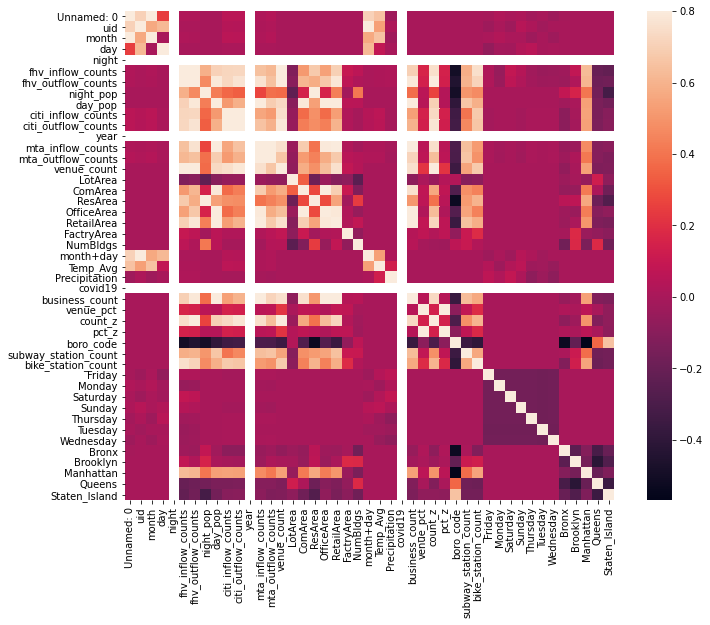

In [ ]:
#Correlation Matrix
corrmat = df19_wd_bd.corr()
 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

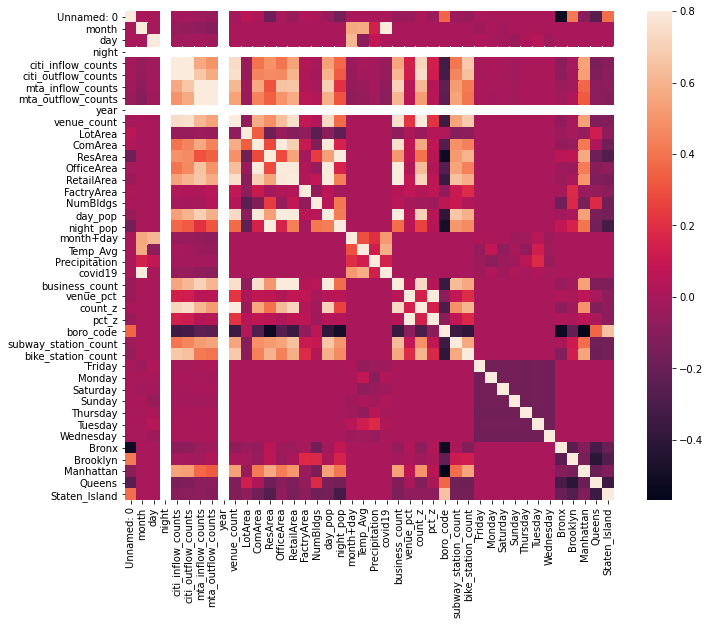

In [ ]:
#Correlation Matrix
corrmat_20 = df20_wd_bd.corr()
 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_20, vmax=.8, square=True)
plt.show()

When we run the correlation check, it is clear the factory area and number of buildings are not related

In [ ]:
df20_wd_bd.columns

Index(['Unnamed: 0', 'hex_id_8', 'month', 'day', 'weekday', 'night',
       'citi_inflow_counts', 'citi_outflow_counts', 'key', 'mta_inflow_counts',
       'mta_outflow_counts', 'year', 'venue_count', 'LotArea', 'ComArea',
       'ResArea', 'OfficeArea', 'RetailArea', 'FactryArea', 'NumBldgs',
       'day_pop', 'night_pop', 'month+day', 'Temp_Avg', 'Precipitation',
       'covid19', 'time', 'business_count', 'venue_pct', 'count_z', 'pct_z',
       'boro_code', 'boro_name', 'subway_station_count', 'bike_station_count',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten_Island'],
      dtype='object')

In [ ]:
#format regression formula for night-time transportation inflows[only contains the dummy variables, weather, and station counts]Friday+Monday+Saturday+Sunday+Thursday+Tuesday+Wednesday+
formula_mta = 'mta_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island'
formula_citi = 'citi_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island'
formula_fhv = 'fhv_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island'

In [ ]:
#format regression formula for night-time transportation inflows[only contains the dummy variables, weather, and station counts]Friday+Monday+Saturday+Sunday+Thursday+Tuesday+Wednesday+
formula_mta20 = 'mta_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island+covid19'
formula_citi20 = 'citi_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island+covid19'
formula_fhv20 = 'fhv_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island+covid19'

In [ ]:
#format regression formula for night-time transportation with Area VariablesFriday+Monday+Saturday+Sunday+Thursday+Tuesday+Wednesday+
formula_mta_area = 'mta_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island+LotArea+ResArea+OfficeArea+RetailArea'
formula_citi_area = 'citi_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island+LotArea+ResArea+OfficeArea+RetailArea'
formula_fhv_area = 'fhv_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island+LotArea+ResArea+OfficeArea+RetailArea'

In [ ]:
#format regression formula for night-time tranportation with population variables:Friday+Monday+Saturday+Sunday+Thursday+Tuesday+Wednesday+
formula_mta_pop = 'mta_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island+day_pop+night_pop'
formula_citi_pop = 'citi_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island+day_pop+night_pop'
formula_fhv_pop = 'fhv_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island+day_pop+night_pop'

**2019 Inflow Regression Models**

In [ ]:
#@title 默认标题文本
#2019 MTA Regressions

inflow_Reg_19mta = smf.ols(formula=formula_mta, data = df19_wd_bd).fit()
print('The following result is 2019 mta night-time inflow regression')
print(inflow_Reg_19mta.summary())

#2019 MTA night-time Regressions with area variables

inflow_Reg_19mta_area = smf.ols(formula=formula_mta_area, data = df19_wd_bd).fit()
print('\n')
print('The following result is 2019 mta night-time inflow regression with area variables')
print(inflow_Reg_19mta_area.summary())

#2019 MTA night-time Regressions with population variables

inflow_Reg_19mta_pop = smf.ols(formula=formula_mta_pop, data = df19_wd_bd).fit()
print('\n')
print('The following result is 2019 mta night-time inflow regression with population variables')
print(inflow_Reg_19mta_pop.summary())

The following result is 2019 mta night-time inflow regression
                            OLS Regression Results                            
Dep. Variable:      mta_inflow_counts   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 6.411e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:31:50   Log-Likelihood:            -1.2522e+06
No. Observations:              143880   AIC:                         2.504e+06
Df Residuals:                  143871   BIC:                         2.504e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [ ]:
#@title 默认标题文本
#2019 Citi Bike night-time Regressions

inflow_Reg_19citi = smf.ols(formula=formula_citi, data = df19_wd_bd).fit()
print('The following result is 2019 Citi Bike night-time inflow regression')
print(inflow_Reg_19citi.summary())

#2019 Citi Bike night-time Regressions with area variables

inflow_Reg_19citi_area = smf.ols(formula=formula_citi_area, data = df19_wd_bd).fit()
print('\n')
print('The following result is 2019 Citi Bike night-time inflow regression with area variables')
print(inflow_Reg_19citi_area.summary())

#2019 MTA night-time Regressions with population variables

inflow_Reg_19citi_pop = smf.ols(formula=formula_citi_pop, data = df19_wd_bd).fit()
print('\n')
print('The following result is 2019 Citi Bike night-time inflow regression with population variables')
print(inflow_Reg_19citi_pop.summary())

The following result is 2019 Citi Bike night-time inflow regression
                            OLS Regression Results                            
Dep. Variable:     citi_inflow_counts   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 3.293e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:32:25   Log-Likelihood:            -5.3570e+05
No. Observations:              143880   AIC:                         1.071e+06
Df Residuals:                  143871   BIC:                         1.072e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [ ]:
#2019 FHV night-time Regressions
inflow_Reg_19fhv = smf.ols(formula=formula_fhv, data = df19_wd_bd).fit()
print('The following result is 2019 FHV Taxi night-time inflow regression')
print(inflow_Reg_19fhv.summary())

#2019 FHV night-time Regressions with area variables
inflow_Reg_19fhv_area = smf.ols(formula=formula_fhv_area, data = df19_wd_bd).fit()
print('\n')
print('The following result is 2019 FHV Taxi night-time inflow regression with area variables')
print(inflow_Reg_19fhv_area.summary())

#2019 MTA night-time Regressions with population variables
inflow_Reg_19fhv_pop = smf.ols(formula=formula_fhv_pop, data = df19_wd_bd).fit()
print('\n')
print('The following result is 2019 FHV Taxi night-time inflow regression with population variables')
print(inflow_Reg_19fhv_pop.summary())

The following result is 2019 FHV Taxi night-time inflow regression
                            OLS Regression Results                            
Dep. Variable:      fhv_inflow_counts   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 6.399e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:32:28   Log-Likelihood:            -9.4663e+05
No. Observations:              143880   AIC:                         1.893e+06
Df Residuals:                  143871   BIC:                         1.893e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

**2020 Inflow Regression Models**

2020 FHV data is not published yet, we are regress on MTA and Citi Bike data

In [ ]:
#2020 MTA Regressions
inflow_Reg_20mta = smf.ols(formula=formula_mta20, data = df20_wd_bd).fit()
print('The following result is 2020 mta night-time inflow regression')
print(inflow_Reg_20mta.summary())

#2020 MTA night-time Regressions with area variables
inflow_Reg_20mta_area = smf.ols(formula=formula_mta_area, data = df20_wd_bd).fit()
print('\n')
print('The following result is 2020 mta night-time inflow regression with area variables')
print(inflow_Reg_20mta_area.summary())

#2020 MTA night-time Regressions with population variables
inflow_Reg_20mta_pop = smf.ols(formula=formula_mta_pop, data = df20_wd_bd).fit()
print('\n')
print('The following result is 2020 mta night-time inflow regression with population variables')
print(inflow_Reg_20mta_pop.summary())

The following result is 2020 mta night-time inflow regression
                            OLS Regression Results                            
Dep. Variable:      mta_inflow_counts   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                 1.842e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:32:30   Log-Likelihood:            -1.2710e+06
No. Observations:              145079   AIC:                         2.542e+06
Df Residuals:                  145069   BIC:                         2.542e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [ ]:
#2020 Citi Bike night-time Regressions

inflow_Reg_20citi = smf.ols(formula=formula_citi20, data = df20_wd_bd).fit()
print('The following result is 2020 Citi Bike night-time inflow regression')
print(inflow_Reg_20citi.summary())

#2020 Citi Bike night-time Regressions with area variables

inflow_Reg_20citi_area = smf.ols(formula=formula_citi_area, data = df20_wd_bd).fit()
print('\n')
print('The following result is 2020 Citi Bike night-time inflow regression with area variables')
print(inflow_Reg_20citi_area.summary())

#2020 MTA night-time Regressions with population variables

inflow_Reg_20citi_pop = smf.ols(formula=formula_citi_pop, data = df20_wd_bd).fit()
print('\n')
print('The following result is 2020 Citi Bike night-time inflow regression with population variables')
print(inflow_Reg_20citi_pop.summary())

The following result is 2020 Citi Bike night-time inflow regression
                            OLS Regression Results                            
Dep. Variable:     citi_inflow_counts   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 2.725e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:32:32   Log-Likelihood:            -5.1585e+05
No. Observations:              145079   AIC:                         1.032e+06
Df Residuals:                  145069   BIC:                         1.032e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

**Regression solely with Dummy variables and station counts**

In [ ]:
mtamodel = 'mta_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island'
citimodel = 'citi_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island'
fhvmodel = 'fhv_inflow_counts~venue_count+subway_station_count+bike_station_count+business_count+Bronx+Brooklyn+Manhattan+Queens+Staten_Island'

In [ ]:
#2019 regression only dummy and station counts.
testmta = smf.ols(formula=mtamodel, data = df19_wd_bd).fit()
print('test mta')
print(testmta.summary())

testciti = smf.ols(formula=citimodel, data = df19_wd_bd).fit()
print('\n')
print('test citi')
print(testciti.summary())

testfhv = smf.ols(formula=fhvmodel, data = df19_wd_bd).fit()
print('\n')
print('test fhv')
print(testfhv.summary())


test mta
                            OLS Regression Results                            
Dep. Variable:      mta_inflow_counts   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 6.411e+04
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:52:24   Log-Likelihood:            -1.2522e+06
No. Observations:              143880   AIC:                         2.504e+06
Df Residuals:                  143871   BIC:                         2.504e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -

**merge 2020 and 2019 MTA data together**

In [ ]:
frame = [df19_wd_bd,df20_wd_bd]

all = pd.concat(frame)

In [ ]:
#2019&2020 Citi Bike night-time Regressions

inflow_Reg_citi = smf.ols(formula=formula_citi, data = all).fit()
print('The following result is 2019&2020 Citi Bike night-time inflow regression')
print(inflow_Reg_citi.summary())

#2019&2020 Citi Bike night-time Regressions with area variables

inflow_Reg_citi_area = smf.ols(formula=formula_citi_area, data = all).fit()
print('\n')
print('The following result is 2019&2020 Citi Bike night-time inflow regression with area variables')
print(inflow_Reg_citi_area.summary())

#2019&2020 MTA night-time Regressions with population variables

inflow_Reg_citi_pop = smf.ols(formula=formula_citi_pop, data = all).fit()
print('\n')
print('The following result is 2019&2020 Citi Bike night-time inflow regression with population variables')
print(inflow_Reg_citi_pop.summary())

The following result is 2019&2020 Citi Bike night-time inflow regression
                            OLS Regression Results                            
Dep. Variable:     citi_inflow_counts   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                 2.959e+04
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:54:58   Log-Likelihood:            -1.0553e+06
No. Observations:              288959   AIC:                         2.111e+06
Df Residuals:                  288941   BIC:                         2.111e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------